In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re

C:\Users\LowJoonK\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Import Datataset
df = pd.read_csv('full-all-2-with-headers.csv', encoding='utf-16')
df.head()

,link,name,current_title,current_location,experiences,educations,skills
0,https://www.linkedin.com/in/pooya-movahed-b897...,Pooya Movahed,Data Scientist at ExxonMobil,"Houston, Texas, United States","[{'titles': ['ExxonMobil', 'Data Scientist', '...","[['Doctor of Philosophy (Ph.D.), Mechanical En...","['Hydrodynamic instabilities', 'Machine Learni..."
1,https://www.linkedin.com/in/emmayaoxie,"Yao Xie, CFA",Data Scientist at PayPal,San Francisco Bay Area,"[{'titles': ['Data Scientist 2'], 'exp': ['Pay...","[['Master of Science - MS, Computer Science', ...","['Financial Modeling', 'Quantitative Analytics..."
2,https://www.linkedin.com/in/xiaozhou-shen,Xiaozhou Shen,Data Scientist at Bayer Crop Science,"Portland, Oregon Metropolitan Area","[{'titles': ['Data Scientist'], 'exp': ['Bayer...","[['Master of Science - MS, Computer Science', ...","['Fortran', 'C (Programming Language)', 'C++',..."
3,https://www.linkedin.com/in/yacine-brini,Yacine Brini,Data Scientist at Patreon,"San Francisco, California, United States","[{'titles': ['Senior Data Scientist'], 'exp': ...","[['Master of Engineering (M.Eng.), Industrial ...","['MySQL', 'Python', 'French', 'English', 'Entr..."
4,https://www.linkedin.com/in/eddy-yeo-wai-kit,"Wai Kit, (Eddy) Y.",Senior Data Scientist | Software Engineer | Su...,"Singapore, Singapore","[{'titles': ['Micron Technology', 'Senior Data...","[['Bachelor of Science (B.Sc.), Computer Scien...","['C#', 'Ruby on Rails', 'C++', 'Amazon Web Ser..."


In [3]:
for col in df.columns:
    print(col)

link
name
current_title
current_location
experiences
educations
skills


In [4]:
df['experiences']

0      [{'titles': ['ExxonMobil', 'Data Scientist', '...
1      [{'titles': ['Data Scientist 2'], 'exp': ['Pay...
2      [{'titles': ['Data Scientist'], 'exp': ['Bayer...
3      [{'titles': ['Senior Data Scientist'], 'exp': ...
4      [{'titles': ['Micron Technology', 'Senior Data...
                             ...                        
125    [{'titles': ['Junior Associate'], 'exp': ['McK...
126    [{'titles': ['Doctoral Candidate'], 'exp': ['N...
127    [{'titles': ['Data Scientist'], 'exp': ['Carso...
128    [{'titles': ['Associate'], 'exp': ['Sprint Mil...
129    [{'titles': ['Data Analyst Intern'], 'exp': ['...
Name: experiences, Length: 130, dtype: object

In [5]:
df['educations']

0      [['Doctor of Philosophy (Ph.D.), Mechanical En...
1      [['Master of Science - MS, Computer Science', ...
2      [['Master of Science - MS, Computer Science', ...
3      [['Master of Engineering (M.Eng.), Industrial ...
4      [['Bachelor of Science (B.Sc.), Computer Scien...
                             ...                        
125    [['Master of Engineering (MEng), Chemical Engi...
126    [['Doctor of Philosophy - PhD, Data Science an...
127    [["Master's degree, Mechanical Engineering in ...
128    [['Bachelors of Game Development, Game Program...
129    [["Bachelor's degree, Computer Science", 'Sep ...
Name: educations, Length: 130, dtype: object

In [6]:
df['skills']

0      ['Hydrodynamic instabilities', 'Machine Learni...
1      ['Financial Modeling', 'Quantitative Analytics...
2      ['Fortran', 'C (Programming Language)', 'C++',...
3      ['MySQL', 'Python', 'French', 'English', 'Entr...
4      ['C#', 'Ruby on Rails', 'C++', 'Amazon Web Ser...
                             ...                        
125    ['Applied Mathematics', 'Nonprofits', 'Custome...
126    ['Machine Learning', 'R (Programming Language)...
127    ['Machine Learning', 'R (Programming Language)...
128    ['Business Intelligence (BI)', 'Analytical Ski...
129    ['Machine Learning', 'Computer Vision', 'Busin...
Name: skills, Length: 130, dtype: object

In [7]:
df.shape
df.describe()

,link,name,current_title,current_location,experiences,educations,skills
count,130,130,130,129,130,130,130
unique,130,130,96,42,129,126,129
top,https://www.linkedin.com/in/pooya-movahed-b897...,Pooya Movahed,Data Scientist,"Kuala Lumpur, Federal Territory of Kuala Lumpu...","[{'titles': ['Standard Chartered Bank', 'Vice ...","[['Petroleum Engineering', '2013 - 2018']]","['Machine Learning', 'R (Programming Language)..."
freq,1,1,22,38,2,2,2


In [8]:
samplesize = len(df.index)
#samplesize
print('Total Data Scientist SampleSize: ' + str(samplesize))
#print(df[df.columns[0]].count())

Total Data Scientist SampleSize: 130


# DataScientist by Area_Pie

In [34]:
DSCount = (df['current_location']).value_counts()
DSCount

Kuala Lumpur, Federal Territory of Kuala Lumpur, Malaysia    38
Petaling Jaya, Selangor, Malaysia                            12
Federal Territory of Kuala Lumpur, Malaysia                   8
Malaysia                                                      6
Selangor, Malaysia                                            6
Cyberjaya, Selangor, Malaysia                                 5
San Francisco Bay Area                                        5
Shah Alam, Selangor, Malaysia                                 4
Ipoh, Perak, Malaysia                                         2
Kajang, Selangor, Malaysia                                    2
Greater Kuala Lumpur                                          2
Bayan Lepas, Penang, Malaysia                                 2
Malacca, Malaysia                                             2
Menlo Park, California, United States                         2
United States                                                 2
Gombak, Selangor, Malaysia              

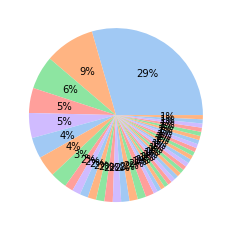

In [41]:
#how to insert label?
#how to sort by lagest to lowest?
#how to increase the pie chart size?
#Data cleaning on location required?

#define data
DSCount = (df['current_location']).value_counts()
#labels = ['current_location']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
#plt.pie(DSCount, labels = labels, colors = colors, autopct='%.0f%%')
plt.pie(DSCount, colors = colors, autopct='%.0f%%')
plt.show()

# DataScientist by Job_Title_Pie

# Prepare Skills for Viz - DataScientist Skills Pareto

In [9]:
#clean 'skills' list special character
df['skills'] = df['skills'].apply(eval)

In [10]:
df['skills']

0      [Hydrodynamic instabilities, Machine Learning,...
1      [Financial Modeling, Quantitative Analytics, V...
2      [Fortran, C (Programming Language), C++, Plasm...
3      [MySQL, Python, French, English, Entrepreneuri...
4      [C#, Ruby on Rails, C++, Amazon Web Services (...
                             ...                        
125    [Applied Mathematics, Nonprofits, Customer Com...
126    [Machine Learning, R (Programming Language), S...
127    [Machine Learning, R (Programming Language), S...
128    [Business Intelligence (BI), Analytical Skills...
129    [Machine Learning, Computer Vision, Business I...
Name: skills, Length: 130, dtype: object

In [11]:
#check 'skills' type
for i, l in enumerate(df['skills']):
 print('list',i,'is',type(l))

list 0 is <class 'list'>
list 1 is <class 'list'>
list 2 is <class 'list'>
list 3 is <class 'list'>
list 4 is <class 'list'>
list 5 is <class 'list'>
list 6 is <class 'list'>
list 7 is <class 'list'>
list 8 is <class 'list'>
list 9 is <class 'list'>
list 10 is <class 'list'>
list 11 is <class 'list'>
list 12 is <class 'list'>
list 13 is <class 'list'>
list 14 is <class 'list'>
list 15 is <class 'list'>
list 16 is <class 'list'>
list 17 is <class 'list'>
list 18 is <class 'list'>
list 19 is <class 'list'>
list 20 is <class 'list'>
list 21 is <class 'list'>
list 22 is <class 'list'>
list 23 is <class 'list'>
list 24 is <class 'list'>
list 25 is <class 'list'>
list 26 is <class 'list'>
list 27 is <class 'list'>
list 28 is <class 'list'>
list 29 is <class 'list'>
list 30 is <class 'list'>
list 31 is <class 'list'>
list 32 is <class 'list'>
list 33 is <class 'list'>
list 34 is <class 'list'>
list 35 is <class 'list'>
list 36 is <class 'list'>
list 37 is <class 'list'>
list 38 is <class 'lis

In [12]:
def skills_to_1D(series):
 return pd.Series([x for _list in series for x in _list])

In [13]:
#frequency count for each skill
skills_to_1D(df['skills']).value_counts()

Data Analysis                    65
Python (Programming Language)    61
Microsoft Excel                  58
Machine Learning                 57
SQL                              56
                                 ..
Instrumentation                   1
Malay                             1
Design for Manufacturing          1
Pareto Analysis                   1
Data Analyst                      1
Length: 702, dtype: int64

Text(0.5, 1.0, 'Skills Sequence')

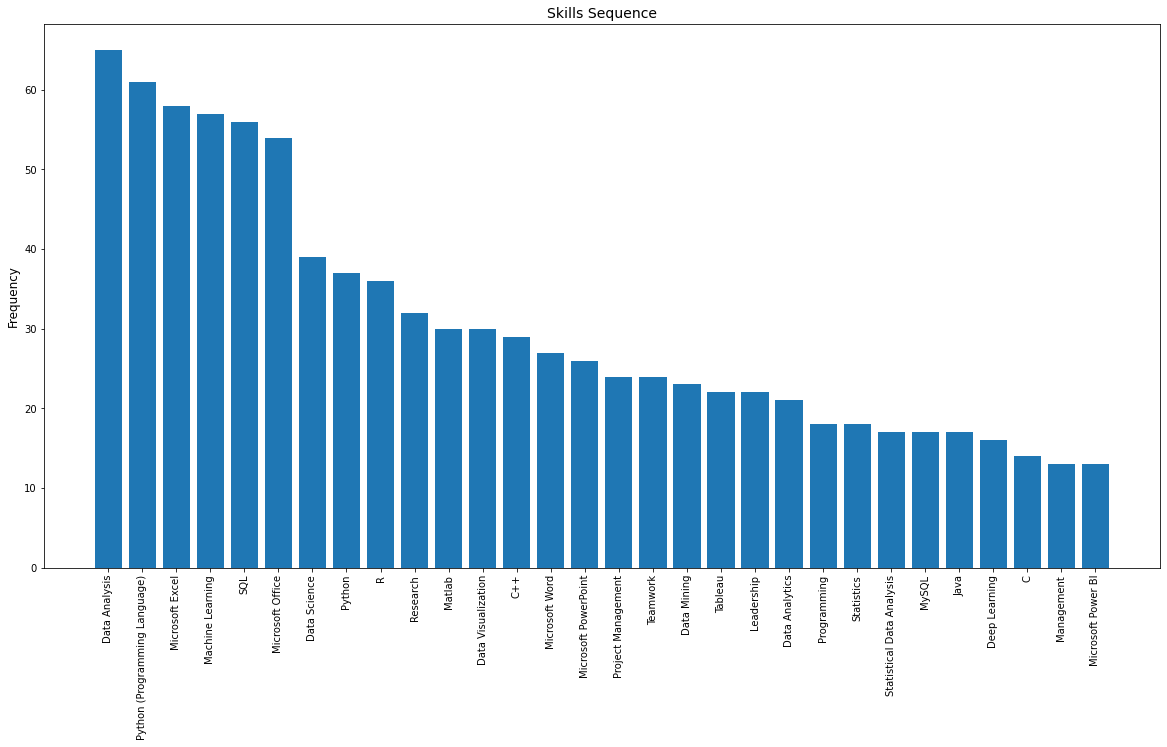

In [14]:
#top 30# Skills
skills_top_30 = skills_to_1D(df['skills']).value_counts()[:30]

fig, ax = plt.subplots(figsize = (20,10))
ax.bar(skills_top_30.index,
        skills_top_30.values)
ax.set_ylabel('Frequency', size = 12)
plt.xticks(rotation = 90)
ax.set_title('Skills Sequence', size = 14)

skills_expanded_clm = df['skills'].apply(pd.Series)
skills_expanded_clm.head() #NaN replaced with 0?

skills_expanded_clm.iloc[:,0].value_counts(normalize = True)

In [15]:
#https://towardsdatascience.com/dealing-with-list-values-in-pandas-dataframes-a177e534f173
#think for skills which library and chart type to use?

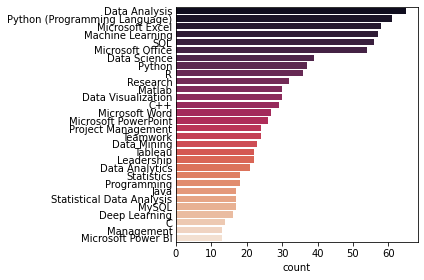

In [16]:
skills = skills_to_1D(df['skills']).str.split(',', expand=True).stack().reset_index(drop=True)
ax = sns.countplot(y=skills, order=skills.value_counts().iloc[:30].index, palette='rocket') #Change iloc as per top-n
ax.tick_params(axis='y', length=0)
plt.tight_layout()
plt.show()

In [27]:
from matplotlib.ticker import PercentFormatter

skills_df = pd.DataFrame(skills_to_1D(df['skills']).value_counts())
#skills_df.columns = ['Skill','Frequency']
skills_df.head()
#skills_sort = skills_df.sort_values(by='count', ascending=False)

,0
Data Analysis,65
Python (Programming Language),61
Microsoft Excel,58
Machine Learning,57
SQL,56


In [ ]:
# Not success to draw Pareto for Skills (Bar cart ok, but not yet assign %)

# DataScientist by Education

# DataScientist Working Years Working Years Experience Distribution